In [7]:
!pip install ipywidgets matplotlib seaborn


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\lucca\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider, Dropdown
# from matplotlib.widgets import Slider, Button, RadioButtons
from scipy.stats import norm


In [9]:

# Auxiliary function for d_one & d_two risk-adjusted probability
d1_fn = lambda S, X, T, r, sigma: (np.log(S/X) + (r + 0.5 * sigma**2)*T) / (sigma * np.sqrt(T))
d2_fn = lambda d1, T, sigma: d1 - sigma * np.sqrt(T)


In [10]:
# Definition of Black-Scholes function

def black_scholes(S, X, T, option_type: 'str', r = 0, sigma=0):
    '''
    Arguments:
    S           -- current spot price of the underlying security
    X           -- option strike price
    T           -- the time until maturity (in fractions of a year)
    r           -- risk-free interest rate 
    sigma       -- returns volatility of the underlying security
    option_type -- the option type, either 'call' or 'put'
    
    Returns: option value [float]
    '''

    d_one = d1_fn(S, X, T, r, sigma)
    d_two = d2_fn(d_one, T, sigma)

    if option_type == 'c': 
        return S * norm.cdf(d_one) - np.exp(-r * T) * X * norm.cdf(d_two)
    elif option_type == 'p': 
        return -(S * norm.cdf(-d_one) - np.exp(-r * T) * X * norm.cdf(-d_two))
    else:
        # Raise an error if the option_type is neither a call nor a put
        raise ValueError("Option type must be either 'call' or 'put'.")

<Axes: >

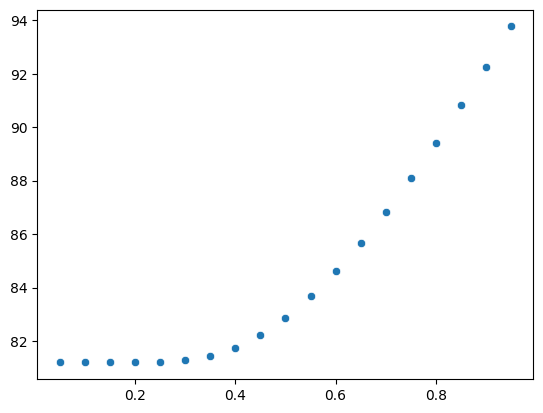

In [11]:
# Example of Spot vs Volatility

example_args = {'Spot':200, 'Strike':120, 'Time':0.5, 'Type':'c', 'IR': 0.02, 'Vol':np.arange(0.05,1,0.05)}

price = black_scholes(*example_args.values())

sns.scatterplot(x=example_args['Vol'],y=price,ax=None)

# Consider making interactive sliders for all possible parameters
# Play around with GUI

In [ ]:
def plot_black_scholes(Spot, Strike, Time, Type, IR, Vol):
    price = black_scholes(Spot, Strike, Time, Type, IR, Vol)
    sns.scatterplot(x=Vol, y=price)
    plt.xlabel('Volatility')
    plt.ylabel('Option Price')
    plt.title('Black-Scholes Option Pricing')
    plt.show()

# Creating sliders and dropdown for interactive plot
interact(plot_black_scholes,
         Spot=IntSlider(min=50, max=300, step=10, value=200, description='Spot Price'),
         Strike=IntSlider(min=50, max=300, step=10, value=120, description='Strike Price'),
         Time=FloatSlider(min=0.1, max=2.0, step=0.1, value=0.5, description='Time to Maturity'),
         Type=Dropdown(options=['c', 'p'], value='c', description='Option Type'),
         IR=FloatSlider(min=0.0, max=0.1, step=0.01, value=0.02, description='Interest Rate'),
         Vol=FloatSlider(min=0.05, max=1.0, step=0.05, value=0.25, description='Volatility')
)

In [ ]:
# Example of Spot vs Volatility wrt. Gamma  

def gamma(S, X, T, r, sigma, option_type):
 
    if option_type == 'c':
        return norm.pdf(d1_fn(S, X, T, r, sigma))/(S*sigma*T)
    elif option_type == 'p':
        return norm.pdf(d2_fn(S, X, T, r, sigma))/(S*sigma*T)
    else:
        # Raise an error if the option_type is neither a call nor a put
        raise ValueError("Option type is either 'call' or 'put'.")

In [ ]:
# Plot two gamma graphs with interactive sliders